이상치(Anomaly)란?  
- 기존 관측과는 상이하여 다른 매커니즘에 의해 생성되었다고 판단할만한 관측값
  
이상치 탐지(Anomaly Detection) 접근방식  
- 여러 알고리즘과 분석론을 활용한 분석 적용
  
이상탐지 목적
- 기회 탐지: 새로움 탐지
- 오류 탐지: 노이즈 제거
  
입력 데이터의 특성
- Time-Series(sequential)시계열 vs Static정적
- Univariate(단변량) vs Multivariate(다변량)
- Data Type( Binary / Categorical / Continuous / Hybrid )
- Relational vs Independent
- Well-known or not(rule existing or not)
  

이상탐지 종류
- Point Anomaly
    - 축적된 시간 동안 정적인 점 분포에 초점
    - 예) Gaussian distribution, Clustering, Classification
- Contextual Anomaly
    - 시계열과 같은 동적인 특성에 초점
    - 예) Gaussian Process Regression, S-H-ESD ...
  
정상 상태의 규명이 화두  
  
Classification과 Anomaly Detection 비교
- Binary Classification
    - 경계면을 찾는 것
- Novelty Detection
    - 이상치가 아닌 영역
- 100만건 중 약 1~2건이 불량이라면 classification으로는 접근 불가능, 이상치 탐색으로 접근 가능
  
Anomaly 종류
- Global Outlier: 직관적으로 떠오르는 Normal 상태와 구분되는 특이값
- Contextual Outlier: 특정 부분에서 다른 부분과는 다른 양상을 띄는 이상치. 관측된 값들의 context를 어떻게 설정하는지가 중요.
  
머신러닝 지도학습(Supervised Learning)을 이용한 이상치 탐지 접근방식
- 이상치가 있는 데이터 학습
- 회귀 / SVM / Decision Tree / 딥러닝 등의 알고리즘을 사용하여 예측
- 이상치는 극소수에 불과하여 실제 트레이닝 시킬 데이터가 충분치 않다.
- 종종 '이상치'로 규명한 것이 매우 애매하게 다른 '정상치'와 구별하기 어려움
  
머신러닝 비지도학습이 이상탐지에 적용이 어려운 이유
- 이상탐지는 판별의 문제. 어떻게 이상한지 아닌지 판별해야 함
- 비지도 학습은 정답이 주어지고 유사한 것을 찾는 문제를 해결하는 것은 일반적으로 부적합
- 분리된 군집들 중에 이상치만 모여있는 모델을 만드는 것은 어려움
  
이상탐지 ML 알고리즘
- 규칙 유도
    - 데이터의 패턴을 찾아 IF-THEN 형태의 규칙으로 정의
    - 데이터의 일부 또는 전체를 표현하는 규칙 반복적으로 찾아나가며 규칙 집합 생성, 과적합 완화 위해 가지치기 과정 거침
- Random Forest(ML)
    - 앙상블 학습방법의 일종
    - 다수의 의사결정나무 집합
- 서포트벡터머신(SVM , ML)
    - 기본적으로 데이터를 두 개의 그룹으로 분류
    - 데이터 분류하는 최적의 기준선을 찾는 것이 목적
- 자기조직화맵(SOM, ML)
    - 비지도 학습 신경망 모델 중 하나
    - 유사한 패턴을 가진 정보 클러스터링
- 히든 마르코프 모델(HMM, ML)
    - 음성, 필기체 인식 등과 같이 시간에 따라 변화하는 것에서 패턴을 인식하는데 유용하게 사용
    - 확률이론 기반. 이전 상태와 현재 상태의 값을 이용하여 미래 값 예측
    - 고려하는 상태의 수에 따라 알고리즘 복잡도 증가
- 유전 알고리즘
    - 유전학에서 다윈의 진화론 개념을 이용한 것.
    - 세대를 반복하면서 자연환경에 적응할 수 있는 적합한 형태로 변이
    - 살아남는 것처럼 해결하고자 하는 문제의 가능한 해들을 대상으로 선택, 교차, 변이 등을 수행하여 최적의 해 찾아내는 방법
- 딥러닝
    - 인간 신경망 구조에서 착안. 입력층, 출력층, 다수의 은닉층을 구성하여 학습하는 방식
    - CNN, RNN(LSTM 모형 많이 이용)

## 신용카드 부정사용 적발(캐글실습) 대회

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 패키지 임포트
import pandas as pd  # To hand with data
import numpy as np  # To match
import seaborn as sns  # to visualization
import matplotlib.pyplot as plt  # to plot the graphs
import matplotlib.gridspec as gridspec  # to do the grid of plots

In [3]:
# 데이터 로드
df_credit = pd.read_csv("data/creditcard.csv")

In [4]:
df_credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
# 탐험적 분석(EDA)
# looking the type and searching for null values
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# the data is stardarized, I will explore them later
# For now I will look the "normal" columns
df_credit[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
# Lets start looking the difference by Normal and Fraud transactions
print("Distribution of Normal(0) and Frauds(1): ")
print(df_credit['Class'].value_counts())

Distribution of Normal(0) and Frauds(1): 
0    284315
1       492
Name: Class, dtype: int64


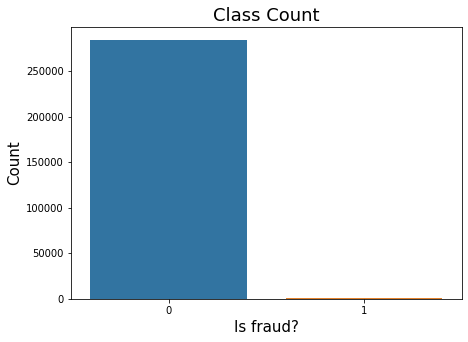

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(df_credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

# Time Features and Feature Engineering
초단위 시간을 분과 시로 변환 및 시각화

In [9]:
timedelta = pd.to_timedelta(df_credit['Time'], unit='s')

In [10]:
df_credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df_credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

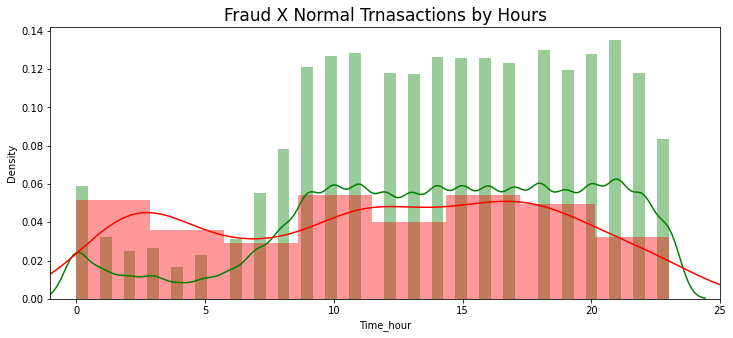

In [11]:
# Exploring the distribution by Class types through hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df_credit[df_credit['Class'] == 0]['Time_hour'], color = 'g')
sns.distplot(df_credit[df_credit['Class'] == 1]['Time_hour'], color = 'r')
plt.title('Fraud X Normal Trnasactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

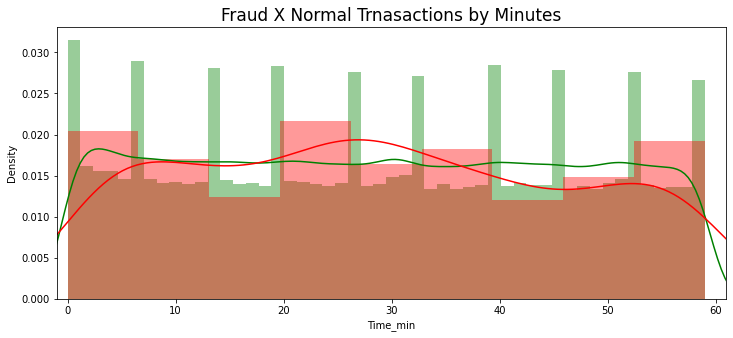

In [12]:
# Exploring the distribution by Class types through hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df_credit[df_credit['Class'] == 0]['Time_min'], color = 'g')
sns.distplot(df_credit[df_credit['Class'] == 1]['Time_min'], color = 'r')
plt.title('Fraud X Normal Trnasactions by Minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

## 스캐터 플롯 Time_min distrigution by Amount

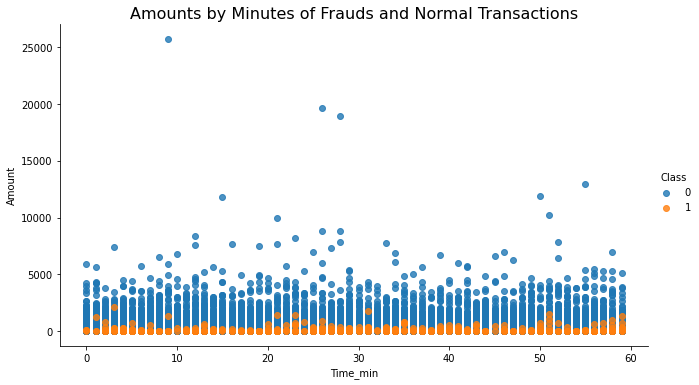

In [13]:
# Looking the Amount and time distribution of FRAUD trnasactions
ax = sns.lmplot(y = 'Amount', x = 'Time_min', fit_reg = False, aspect = 1.8,
                data = df_credit, hue = 'Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions", fontsize = 16)
plt.show()

fraud의 경우 큰 금액보다 작은 금액에서 많이 발생한다는 것을 시각적으로 확인

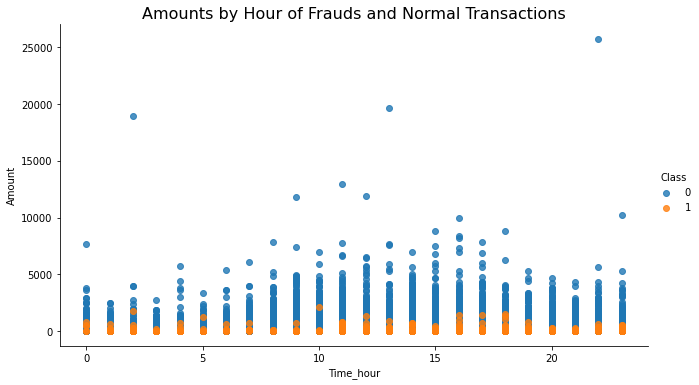

In [14]:
# Looking the Amount and time distribution of FRAUD trnasactions
ax = sns.lmplot(y = 'Amount', x = 'Time_hour', fit_reg = False, aspect = 1.8,
                data = df_credit, hue = 'Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize = 16)
plt.show()

## 이상치와 정상치 분포 비교 시각화

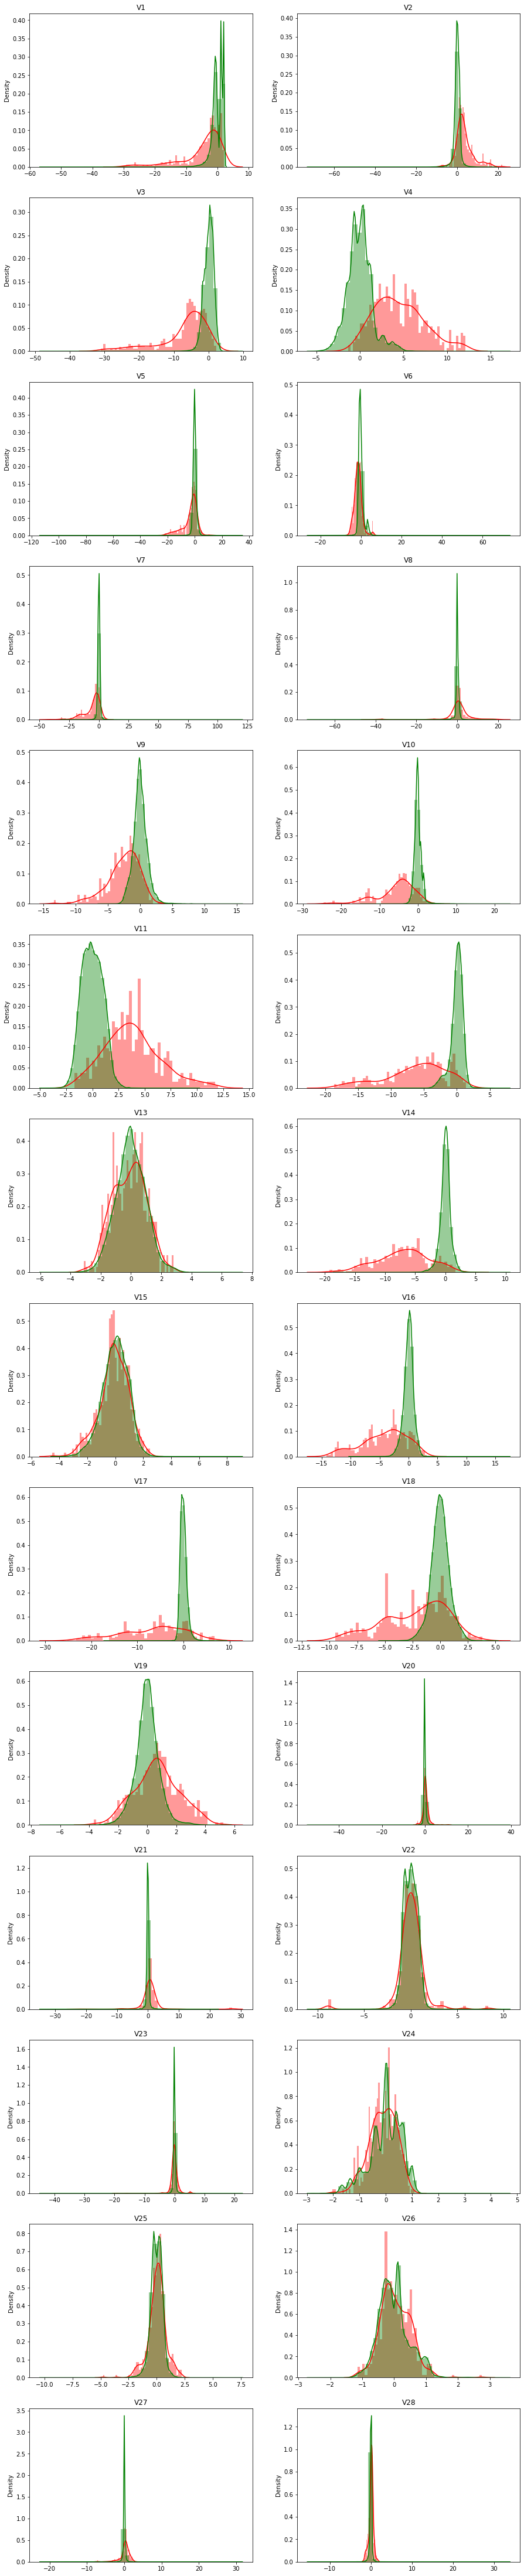

In [15]:
# Looking the V's features
columns = df_credit.iloc[:, 1:29].columns

frauds = df_credit.Class == 1
normals = df_credit.Class == 0

grid = gridspec.GridSpec(14,2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_credit[col][frauds], bins = 50, color = 'red')  # Will receive the "semi-salmon" violin
    sns.distplot(df_credit[col][normals], bins = 50, color = 'green')  # Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

## Feature selections

In [16]:
# I will select the variables where fraud class have a interesting behavior and might can help us predict
df_credit = df_credit[['Time_hour','Time_min','V2','V3','V4','V9','V10','V11','V12','V14','V16','V17','V18','V19','V27','Amount','Class']]

In [17]:
df_credit.head(10)

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,149.62,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,2.69,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,378.66,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,123.50,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,69.99,0
5,0,0,0.960523,1.141109,-0.168252,-0.568671,-0.371407,1.341262,0.359894,-0.137134,0.401726,-0.058133,0.068653,-0.033194,0.253844,3.67,0
6,0,0,0.141004,0.045371,1.202613,0.464960,-0.099254,-1.416907,-0.153826,0.167372,-0.443587,0.002821,-0.611987,-0.045575,0.034507,4.99,0
7,0,0,1.417964,1.074380,-0.492199,0.615375,1.249376,-0.619468,0.291474,-1.323865,-0.076127,-1.222127,-0.358222,0.324505,-1.206921,40.80,0
8,0,0,0.286157,-0.113192,-0.271526,-0.392048,-0.410430,-0.705117,-0.110452,0.074355,-0.210077,-0.499768,0.118765,0.570328,0.011747,93.20,0
9,0,0,1.119593,1.044367,-0.222187,-0.736727,-0.366846,1.017614,0.836390,-0.443523,0.739453,-0.540980,0.476677,0.451773,0.246219,3.68,0


## Some Feature Engineering

In [18]:
df_credit.Amount = np.log(df_credit.Amount + 0.001)    # 0이 되면 컴퓨팅이 안되는 경우가 있어서 0.001 근사치를 넣어준다.

데이터 분석을 하기 위해 log를 취하는 이유는 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함.  
데이터 간 편차를 줄여 왜도1(skewness)와 첨도2(Kurtosis)를 줄일 수 있기 때문에 정규성이 높아진다.  
연령 같은 경우에는 숫자의 범위가 약 0세~120세 이하 이겠지만, 재산 보유액 같은 경우에는 0원에서 몇 조단위까지 올라갈 수 있다.  
즉, 데이터 간 단위가 달라지면 결과값이 이상해 질 수 있다.  
log의 역할은 큰 수를 같은 비율의 작은 수로 바꿔 주는 것이다.  
log는 큰 수를 작게 만들고 복잡한 계산을 간편하게 하기위해 사용한다. 로그를 취하는 순간 그 수는 지수가 되어버리니, 값이 작아 진다.

In [19]:
# Looking the final df
df_credit.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


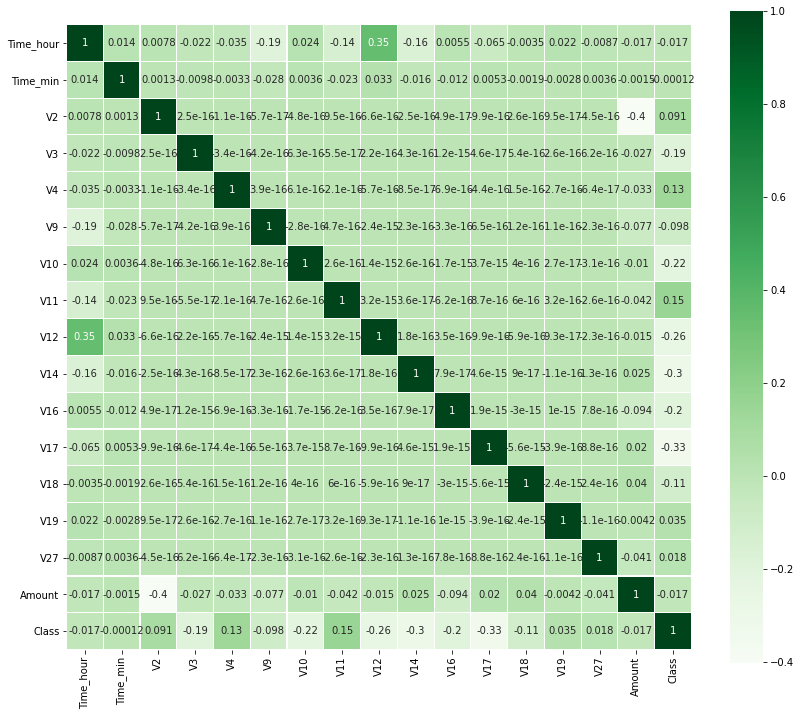

In [20]:
colormap = plt.cm.Greens
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True)
plt.show()

## 모델링

In [35]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb  # To do our transformation in  a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [36]:
X = df_credit.drop(['Class'], axis=1)  # Setting the X to do the split
y = df_credit['Class'].values  # transforming tne values in array

In [37]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta = 2)))
    
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

#classifier = RandomForestClassifier

In [38]:
# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# Showing the difference before after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


SMOTE를 통해 테스트 데이터셋 수를 증폭시켰다.

# 모델평가 (SMOTE + Random Forest)

In [40]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[56869     9]
 [   13    71]]

SMOTE Pipeline Score 0.9996137776061234

SMOTE + RandomForest classification
accuracy: 0.9996137776061234
precision: 0.8875
recall: 0.8452380952380952
f2: 0.8533653846153847
